In [42]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, Sequential
import numpy as np
import pathlib
import shutil
import random
import os
from PIL import Image

In [4]:
img_classes = ['0', '1', '2', '3', '4', '5']

dir_data = pathlib.Path.cwd().joinpath('data')
dir_train = dir_data.joinpath('train')
dir_valid = dir_data.joinpath('validation')
dir_test = dir_data.joinpath('test')

pct_train = 0.8
pct_valid = 0.1
pct_test = 0.1

In [5]:
def setup_folder_structure() -> None:
    if not dir_data.exists(): dir_data.mkdir()
    if not dir_train.exists(): dir_train.mkdir()
    if not dir_valid.exists(): dir_valid.mkdir()
    if not dir_test.exists(): dir_test.mkdir()

    for cls in img_classes:
        if not dir_train.joinpath(cls).exists(): dir_train.joinpath(cls).mkdir()
        if not dir_valid.joinpath(cls).exists(): dir_valid.joinpath(cls).mkdir()
        if not dir_test.joinpath(cls).exists(): dir_test.joinpath(cls).mkdir()

    return

In [6]:
setup_folder_structure()

In [7]:
def train_test_validation_split(src_folder: pathlib.PosixPath, class_name: str) -> dict:
    n_train, n_valid, n_test = 0, 0, 0
    random.seed(42)

    for file in src_folder.iterdir():
        img_name = str(file).split('\\')[-1]

        if file.suffix == '.png':
            x = random.random()

            tgt_dir = ''

            if x <= pct_train:
                tgt_dir = 'train'
                n_train += 1
            elif pct_train < x <= (pct_train + pct_valid):
                tgt_dir = 'validation'
                n_valid += 1
            else:
                tgt_dir = 'test'
                n_test += 1

            shutil.copy(
                src=file,
                dst=dir_data.joinpath(tgt_dir).joinpath(class_name).joinpath(img_name)
            )
    return {
        'source': str(src_folder),
        'target': str(dir_data),
        'n_train': n_train,
        'n_valid': n_valid,
        'n_test': n_test
    }

In [12]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('dataset/0'),
    class_name='0'
)

CPU times: user 163 ms, sys: 309 ms, total: 472 ms
Wall time: 912 ms


{'source': '/home/shtekxr/projects/visioner/dataset/0',
 'target': '/home/shtekxr/projects/visioner/data',
 'n_train': 2393,
 'n_valid': 298,
 'n_test': 309}

In [13]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('dataset/1'),
    class_name='1'
)

CPU times: user 114 ms, sys: 198 ms, total: 311 ms
Wall time: 294 ms


{'source': '/home/shtekxr/projects/visioner/dataset/1',
 'target': '/home/shtekxr/projects/visioner/data',
 'n_train': 2393,
 'n_valid': 298,
 'n_test': 309}

In [15]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('dataset/2'),
    class_name='2'
)

CPU times: user 143 ms, sys: 240 ms, total: 383 ms
Wall time: 360 ms


{'source': '/home/shtekxr/projects/visioner/dataset/2',
 'target': '/home/shtekxr/projects/visioner/data',
 'n_train': 2393,
 'n_valid': 298,
 'n_test': 309}

In [16]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('dataset/3'),
    class_name='3'
)

CPU times: user 139 ms, sys: 208 ms, total: 347 ms
Wall time: 326 ms


{'source': '/home/shtekxr/projects/visioner/dataset/3',
 'target': '/home/shtekxr/projects/visioner/data',
 'n_train': 2393,
 'n_valid': 298,
 'n_test': 309}

In [17]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('dataset/4'),
    class_name='4'
)

CPU times: user 108 ms, sys: 219 ms, total: 327 ms
Wall time: 309 ms


{'source': '/home/shtekxr/projects/visioner/dataset/4',
 'target': '/home/shtekxr/projects/visioner/data',
 'n_train': 2393,
 'n_valid': 298,
 'n_test': 309}

In [18]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('dataset/5'),
    class_name='5'
)

CPU times: user 137 ms, sys: 229 ms, total: 366 ms
Wall time: 348 ms


{'source': '/home/shtekxr/projects/visioner/dataset/5',
 'target': '/home/shtekxr/projects/visioner/data',
 'n_train': 2393,
 'n_valid': 298,
 'n_test': 309}

In [8]:
def plot_random_sample(img_dir: pathlib.PosixPath):
    n = 10
    imgs = random.sample(list(img_dir.iterdir()), n)

    num_row, num_col = 2, 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    for i in range(num_row * num_col):
        img = plt.imread(str(imgs[i]))
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        ax.set_title('\\'.join(str(imgs[i]).split('\\')[-3:]))

    plt.tight_layout()
    plt.savefig(img_dir.joinpath('random_sample.png'))


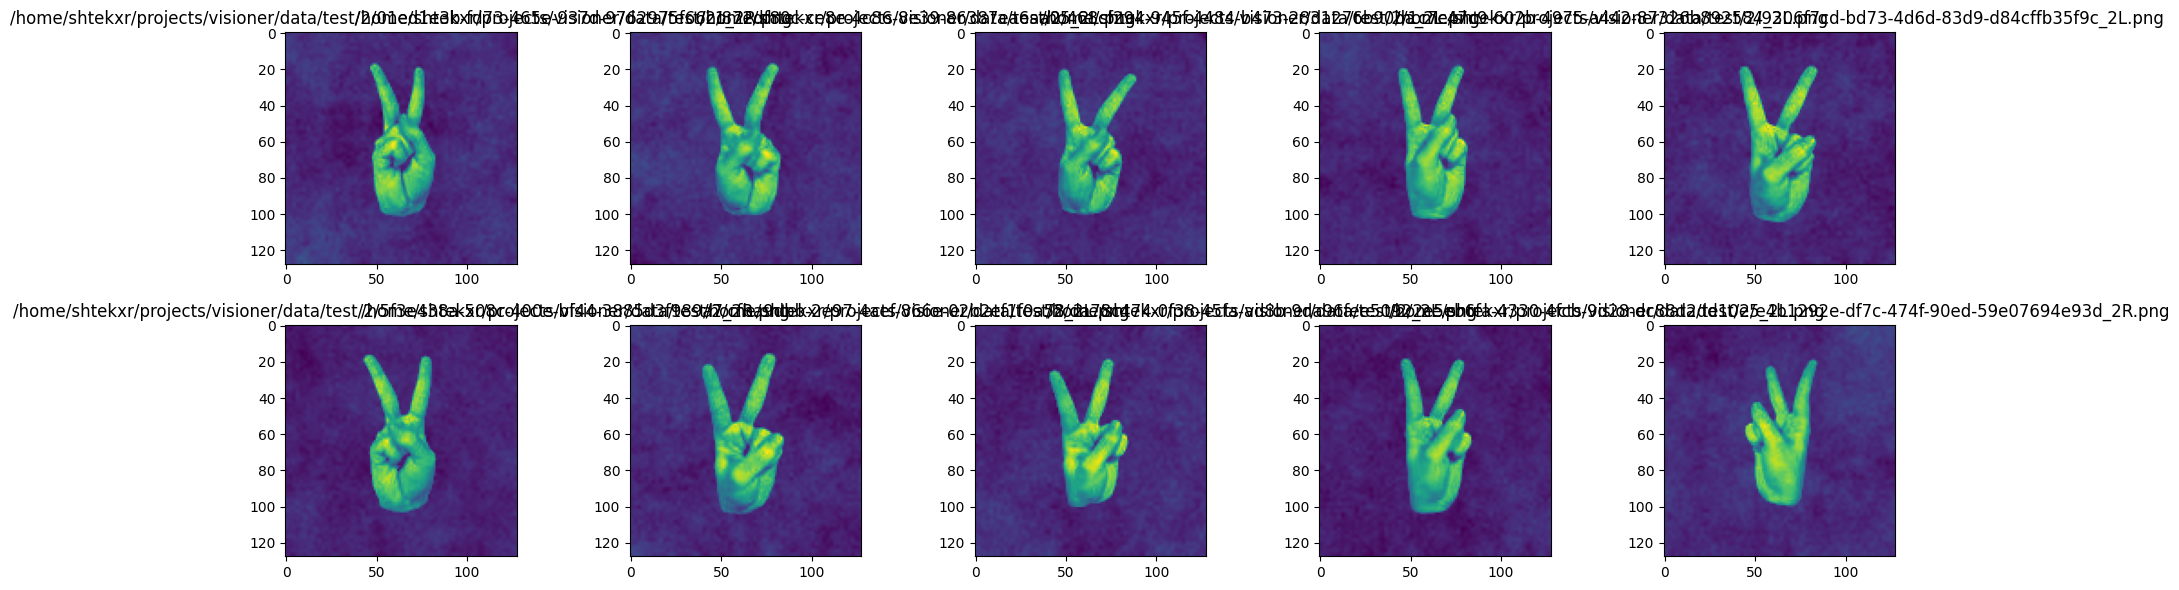

In [9]:
plot_random_sample(img_dir=pathlib.Path.cwd().joinpath('data/test/2'))

In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [11]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    seed=42
)


Found 14360 images belonging to 6 classes.


In [14]:
first_batch = train_data.__next__()

In [16]:
first_batch[0].shape, first_batch[1].shape

((32, 128, 128, 3), (32, 6))

In [24]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 32
    num_row, num_col = 4, 8
    fix, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))

    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        

    plt.tight_layout()
    plt.show()


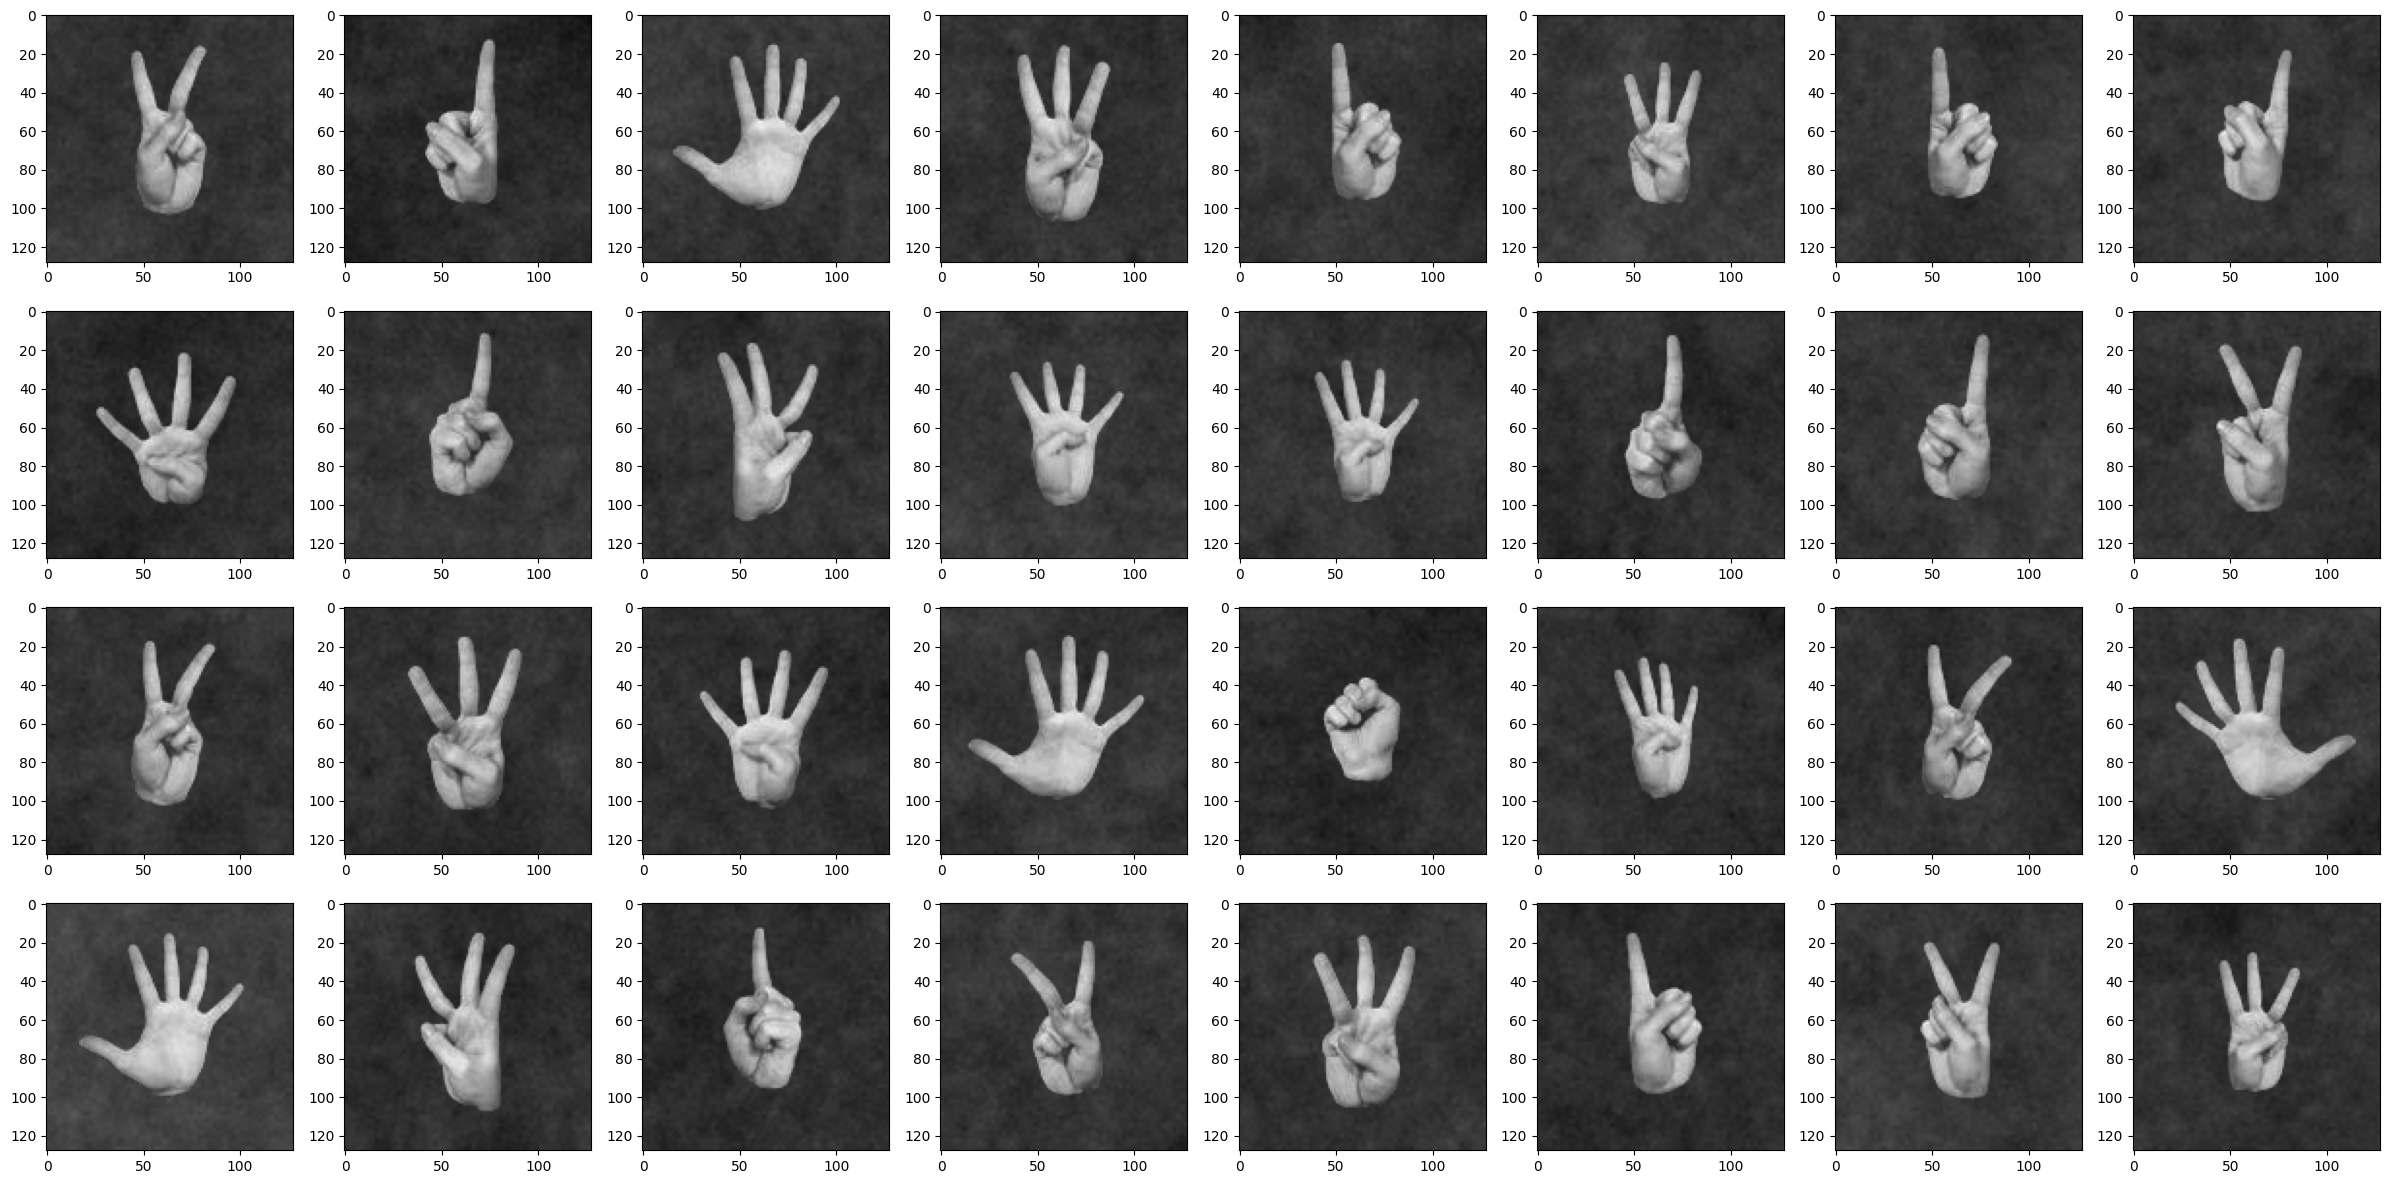

In [26]:
visualize_batch(batch=first_batch)

In [27]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

valid_data = train_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

Found 14360 images belonging to 6 classes.
Found 1789 images belonging to 6 classes.


In [34]:
model_1 = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1),

    layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10


/home/shtekxr/projects/visioner/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.1768 - loss: 12.2695 - val_accuracy: 0.3365 - val_loss: 1.7299
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1693 - loss: 1.7910 - val_accuracy: 0.4343 - val_loss: 1.5817
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1702 - loss: 1.8312 - val_accuracy: 0.4779 - val_loss: 1.3596
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1814 - loss: 1.7891 - val_accuracy: 0.6417 - val_loss: 1.1875
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1685 - loss: 1.8029 - val_accuracy: 0.6339 - val_loss: 1.0873
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1730 - loss: 1.7892 - val_accuracy: 0.6646 - val_loss: 1.0256
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1620 - loss: 1.8147 - val_accuracy: 0.5461 - val_loss: 1.2368
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1748 - loss: 1.8009 - val_accuracy: 0.57

In [35]:
model_2 = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),

    layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10


/home/shtekxr/projects/visioner/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5413 - loss: 1.5255 - val_accuracy: 0.8910 - val_loss: 0.2954
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9070 - loss: 0.2753 - val_accuracy: 0.9089 - val_loss: 0.2211
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9554 - loss: 0.1458 - val_accuracy: 0.9670 - val_loss: 0.0954
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9655 - loss: 0.1182 - val_accuracy: 0.9050 - val_loss: 0.2054
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9683 - loss: 0.0947 - val_accuracy: 0.9922 - val_loss: 0.0607
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9788 - loss: 0.0665 - val_accuracy: 0.9832 - val_loss: 0.0648
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9792 - loss: 0.0865 - val_accuracy: 0.9821 - val_loss: 0.0507
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9748 - loss: 0.0834 - val_accuracy: 0.997

In [103]:
model_3 = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.4),
    layers.RandomContrast(0.2),


    layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model_3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_3 = model_3.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.5415 - loss: 1.1274 - val_accuracy: 0.9933 - val_loss: 0.0455
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9528 - loss: 0.1632 - val_accuracy: 0.9877 - val_loss: 0.0550
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9814 - loss: 0.0602 - val_accuracy: 0.9871 - val_loss: 0.0633
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9863 - loss: 0.0416 - val_accuracy: 0.9894 - val_loss: 0.0390
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9898 - loss: 0.0283 - val_accuracy: 0.9939 - val_loss: 0.0282
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9905 - loss: 0.0337 - val_accuracy: 0.9972 - val_loss: 0.0249
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9909 - loss: 0.0303 - val_accuracy: 0.9978 - val_loss: 0.0581
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9891 - loss: 0.0781 - 

In [90]:
def prepare_single_image(img_path: str) -> np.ndarray:
    img = Image.open(img_path)
    img = img.resize(size=(128, 128))
    return np.array(img) / 255.0

In [91]:
single_image = prepare_single_image(img_path='test.png')

In [92]:
second_image = prepare_single_image(img_path='test0.jpg')

In [116]:
# 2 пальца
first_prediction = model_3.predict(single_image.reshape(-1, 128, 128, 3))
first_prediction





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.0839060e-06, 1.1950278e-02, 9.8791540e-01, 1.3316363e-04,
        6.4152088e-09, 1.4622001e-09]], dtype=float32)

In [119]:
# 0 пальцев (кулак)
second_prediction = model_3.predict(second_image.reshape(-1, 128, 128, 3))
second_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[3.5159765e-03, 7.6738161e-01, 2.2909650e-01, 5.0403555e-06,
        8.2237142e-09, 8.9013133e-07]], dtype=float32)

In [115]:
model_3.save('fingers_model3.keras')